## Import required libraries

In [122]:
import pandas as pd
import numpy as np
import os

import datetime
from datetime import date, timedelta

#from tqdm.notebook import tqdm
from tqdm import tqdm_notebook

from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#pd.set_option('precision', 3)

## Earth continents

In [123]:
continents = {}
continents['europe']=['Portugal', 'Italy', 'Germany', 'Finland', 'Estonia', 'Hungary', 
                      'Spain', 'Slovakia', 'Ireland', 'Iceland', 'France',  'Norway', 
                      'Lithuania', 'Turkey', 'Switzerland', 'Belgium', 'Denmark',  
                      'Poland', 'Austria', 'Sweden', 'CzechRepublic', 'Netherlands',
                      'UnitedKingdom',  'Latvia', 'Greece', 'Luxemborg']
continents['north_america']= 'USA Canada'.split()
continents['south_america']=['Ecuador', 'Panama', 'Peru',  'Uruguay', 'CostaRica',
                            'Mexico', 'Argentina', 'ElSalvador', 'Chile', 'Brazil', 
                            'Honduras', 'Guatemala','Bolivia', 'Columbia','DominicanRepublic', 'Paraguay']
continents['oceania']='Australia NewZealand'.split()
continents['asia']= ['Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Japan', 'Singapore', 'HongKong']

In [124]:
continents['all']=[]
continents['all'].extend(continents['asia'])
continents['all'].extend(continents['oceania'])
continents['all'].extend(continents['south_america'])
continents['all'].extend(continents['north_america'])
continents['all'].extend(continents['europe'])

## Danceability clusters

In [125]:
dance_clust = {}
dance_clust['1']=[ "Portugal", "Italy",    "Finland",  "Estonia",  "Hungary", 
                  "Slovakia", "Ireland",  "Iceland",  "Brazil",   "Canada",  
                  "Belgium",  "Norway",   "Lithuania","New Zealand"    "Turkey",  
                  "USA", "Switzerland"    "Denmark",  "Poland",   "Austria", 
                  "Sweden",   "Czech Republic" "Netherlands",    "UK", 
                  "Australia","Latvia"]

dance_clust['2']= ["Ecuador",     "Panama",      "Germany",     "Spain",      
                   "Peru", "Uruguay",     "Costa Rica",  "Mexico",     
                   "France",      "Argentina",   "El Salvador", "Chile",      
                   "Honduras",    "Guatemala",   "Bolivia",     "Colombia",   
                   "Dominican Republic" "Paraguay",    "Greece",]

dance_clust['3']=[ "Indonesia" ,  "Malaysia" ,   "Philippines", "Taiwan",      "Japan",       "Singapore",   "HongKong"]

## Valence clusters

In [126]:
valence_clust = {}
valence_clust['1']=[ "Portugal",  "Italy","Germany",   "Finland",   "Estonia",  
                    "Hungary",   "Slovakia",  "Ireland",   "Iceland",   "Canada",   
                    "Belgium",   "France",    "Lithuania", "New Zealand"    "Turkey",   
                    "Japan","Switzerland"    "Denmark",   "Poland",    "Austria",  
                    "Sweden",    "Czech Republic", "Netherlands",    "UK",      
                    "Australia", "Latvia",    "Greece"   ]

valence_clust['2']= ["Indonesia","Malaysia", "Norway","Philippines" "Taiwan","USA","Singapore",  "HongKong" ]

valence_clust['3']=["Ecuador", "Panama",  "Spain",   "Peru",   
                    "Brazil",  "Uruguay", "Costa Rica" ,        "Mexico", 
                    "Argentina"  ,        "El Salvador" ,       "Chile",   "Honduras",
                    "Guatemala" ,         "Bolivia", "Colombia","Dominican Republic"
                    "Paraguay"]

## Energy clusters

In [127]:
energy_clust = {}
energy_clust['1']=["Indonesia" ,  "Iceland" ,    "Malaysia",    "Philippines",
                   "Taiwan",      "New Zealand", "USA",        "Singapore","HongKong"   ]

energy_clust['2']= ["Portugal" ,      "Estonia" ,       "Slovakia"  ,     "Ireland" ,       "Canada" ,       
                    "Belgium",        "Mexico" ,        "France"    ,     "Norway" ,        "Lithuania",
                    "Turkey"  ,       "Switzerland"    "Denmark" ,       "Sweden"  ,       "Czech Republic",
                    "Netherlands" ,   "UK"       ,      "World"   ,       "Australia" ,     "Latvia"   ,     
                    "Greece" ]

energy_clust['3']=["Ecuador",    "Panama",     "Italy",      "Germany",                
                   "Finland",    "Hungary",    "Spain",      "Peru",
                   "Brazil",     "Uruguay",    "Costa Rica", "Argentina", 
                   "El Salvador","Chile",      "Japan", "Honduras",  
                   "Guatemala",  "Bolivia",    "Poland",     "Austria",   
                   "Colombia",   "Dominican Republic", "Paraguay"]

In [128]:
resample_freq='W'
target_countries = continents['all']

In [129]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK


In [130]:
ranking_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749500 entries, 0 to 18749499
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   URL           object        
 5   Date          datetime64[ns]
 6   Region        object        
 7   song_id       object        
 8   release_date  datetime64[ns]
 9   danceability  float64       
 10  valence       float64       
 11  energy        float64       
 12  id            object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 2.0+ GB


## Read weather data

In [131]:
weather_df= pd.read_csv(os.path.join('generated_data','all_weather.csv'), header=[0,1], index_col=0)
weather_df.index= pd.to_datetime(weather_df.index)
weather_df[('country','World')]= weather_df.mean(axis=1)
weather_df.head()

country                                                       \
           Netherlands Philippines Singapore       Peru   Denmark     Italy   
date                                                                          
2017-01-01    1.729167   27.250000   27.4125  22.450000  5.645833  5.000000   
2017-01-02    3.208333   27.208333   26.5875  21.314286  0.875000  8.191489   
2017-01-03    5.375000   28.333333   26.3375  21.157143  3.306122  9.791667   
2017-01-04    6.145833   27.750000   26.7500  22.150000  1.958333  5.354167   
2017-01-05    0.708333   26.708333   27.9000  23.025000 -5.729167  5.729167   

                                                      ...            \
                Chile Lithuania  Slovakia  Indonesia  ...   Hungary   
date                                                  ...             
2017-01-01  25.357143    5.0750 -6.052632  31.444444  ... -6.711538   
2017-01-02  26.285714    1.1375 -4.540000  31.407407  ... -5.560000   
2017-01-03  23.785714   -1.9875  1.160000  30.115385  ... -0.354167   
2017-01-04  23.454545   -2.9125  3.345455  27.448276  ...  0.218182   
2017-01-05  26.285714  -13.5375 -1.041667  28.592593  ... -0.788462   

                                                                        \
            Argentina Poland  Bolivia  Guatemala   Honduras     Taiwan   
date                                                                     
2017-01-01  30.304348    NaN   9.2250        NaN  20.842857  22.642857   
2017-01-02  25.375000    NaN   9.7200  22.600000  20.612500  21.422222   
2017-01-03  25.533333    NaN  10.6250  19.533333  19.400000  20.509434   
2017-01-04  26.291667    NaN   8.7375  12.800000  20.325000  23.380952   
2017-01-05  24.826087    NaN   7.7250        NaN  19.950000  22.395833   

                                                
              Estonia CzechRepublic      World  
date                                            
2017-01-01   3.162500     -6.296296  11.250720  
2017-01-02  -2.175000     -3.458333  10.911742  
2017-01-03  -4.279167     -0.321429  11.447292  
2017-01-04  -8.895833      0.705882  11.365506  
2017-01-05 -12.326087     -3.437500   9.124424  

[5 rows x 54 columns]

In [132]:
target_weather= weather_df.iloc[:, weather_df.columns.get_level_values(1).isin(target_countries)].mean(axis=1)
if resample_freq!= 'D':
    target_weather = target_weather.resample(resample_freq).mean()
target_weather.head()

date
2017-01-01    11.250720
2017-01-08     9.919374
2017-01-15    10.918179
2017-01-22    10.500699
2017-01-29    10.617394
Freq: W-SUN, dtype: float64

## Merge all data

In [133]:
def generate_target_multivariate_timeseries(songs_df, country_lst, resample=None):
    
    country_df = ranking_features_df[ranking_features_df['Region'].isin(country_lst)]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
 
    if resample != 'D':
        daily_country_df = daily_country_df.resample(resample).mean()
    
    return daily_country_df

In [134]:

target_ts = generate_target_multivariate_timeseries(ranking_features_df, 
                                                    target_countries, 
                                                    resample=resample_freq)

In [135]:
target_ts['weather']= target_weather

In [136]:
target_ts.head()

,danceability,valence,energy,weather
Date,,,,
2017-01-01,0.668335,0.554350,0.690735,11.250720
2017-01-08,0.662987,0.521540,0.677882,9.919374
2017-01-15,0.661897,0.517711,0.675661,10.918179
2017-01-22,0.661579,0.517181,0.675236,10.500699
2017-01-29,0.661190,0.518091,0.674861,10.617394


# Data visualization

In [137]:
target_ts.head().describe()

,danceability,valence,energy,weather
count,5.000000,5.000000,5.000000,5.000000
mean,0.663198,0.525775,0.678875,10.641273
std,0.002949,0.016065,0.006733,0.497386
min,0.661190,0.517181,0.674861,9.919374
25%,0.661579,0.517711,0.675236,10.500699
50%,0.661897,0.518091,0.675661,10.617394
75%,0.662987,0.521540,0.677882,10.918179
max,0.668335,0.554350,0.690735,11.250720


### Cointegration test

In [138]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,7)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    
    def adjust(val, length= 6): 
        return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

    print(out.trace_stat)

In [139]:
cointegration_test(target_ts)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
danceability ::  54.97     > 40.1749   =>   True
valence ::  17.45     > 24.2761   =>   False
energy ::  7.26      > 12.3212   =>   False
weather ::  0.33      > 4.1296    =>   False
[54.97219885 17.44737295  7.25983543  0.33334446]


### Granger test

In [140]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(target_ts, variables = target_ts.columns)

,danceability_x,valence_x,energy_x,weather_x
danceability_y,1.0000,0.0043,0.0157,0.0261
valence_y,0.0000,1.0000,0.0000,0.0031
energy_y,0.0012,0.0002,1.0000,0.0002
weather_y,0.0331,0.1292,0.0126,1.0000


In [86]:
target_ts

,danceability,valence,energy,weather
Date,,,,
2017-01-01,0.661483,0.516450,0.669711,4.398201
2017-01-08,0.660044,0.493551,0.663224,1.884014
2017-01-15,0.659145,0.488941,0.661017,4.045547
2017-01-22,0.658882,0.485850,0.661528,3.638521
2017-01-29,0.659581,0.487757,0.660800,4.218135
...,...,...,...,...
2022-01-30,0.669485,0.509942,0.644857,4.198094
2022-02-06,0.668287,0.507646,0.643404,4.531983
2022-02-13,0.668140,0.510830,0.646870,5.907882


### Augmented Dickey-Fuller Test

In [87]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [88]:
adfuller_test(target_ts['danceability'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2348
 No. Lags Chosen       = 0
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.


In [89]:
adfuller_test(target_ts['valence'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4212
 No. Lags Chosen       = 2
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.1358. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [90]:
adfuller_test(target_ts['energy'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6326
 No. Lags Chosen       = 1
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0864. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


We diferenciate the time series to make it stationary

In [91]:
target_ts_differenced = target_ts.diff().dropna()
diff_=True

In [92]:
adfuller_test(target_ts_differenced['danceability'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.2907
 No. Lags Chosen       = 0
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [93]:
adfuller_test(target_ts_differenced['valence'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.302
 No. Lags Chosen       = 1
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [94]:
adfuller_test(target_ts_differenced['valence'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.302
 No. Lags Chosen       = 1
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


### Select order for VAR Model

In [95]:
model = VAR(target_ts_differenced)

In [96]:
x = model.select_order(maxlags=24)
x.summary()

,AIC,BIC,FPE,HQIC
0,-31.23,-31.17*,2.736e-14,-31.21*
1,-31.32,-31.03,2.503e-14,-31.20
2,-31.39,-30.88,2.321e-14,-31.19
3,-31.36,-30.62,2.395e-14,-31.06
4,-31.43*,-30.45,2.249e-14*,-31.04
5,-31.39,-30.19,2.329e-14,-30.91
6,-31.32,-29.89,2.518e-14,-30.74
7,-31.29,-29.63,2.597e-14,-30.62
8,-31.18,-29.29,2.893e-14,-30.42
9,-31.12,-29.01,3.071e-14,-30.27


In [97]:
n_lags=2

In [98]:
model_fitted = model.fit(n_lags)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 31, Mar, 2022
Time:                     00:25:50
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.8623
Nobs:                     267.000    HQIC:                  -31.1517
Log likelihood:           2705.27    FPE:                2.43581e-14
AIC:                     -31.3460    Det(Omega_mle):     2.13330e-14
--------------------------------------------------------------------
Results for equation danceability
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.000021         0.000406            0.051           0.959
L1.danceability         0.132432         0.120232            1.101           0.271
L1.valence             -0.100349         0.09

In [99]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

def adjust(val, length= 6): return str(val).ljust(length)


for col, val in zip(target_ts_differenced.columns, out):
    print(adjust(col), ':', round(val, 2))

danceability : 2.04
valence : 1.98
energy : 2.04
weather : 2.02


### Forecast test

In [100]:
def rolling_window(values_lst, window_size, n_features):
    array= []
    for i in range(values_lst.shape[0]-window_size+1):
        if array is not None:
            array.append(values_lst[i:i+window_size,:].reshape(window_size,n_features))
        else:
            array = values_lst[i:i+window_size,:].reshape(1,window_size,n_features)
    return np.array(array)

def mape_fn(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_as_dataframe_fn(y_valid, y_hat):
    metrics= []
    metrics_global = {'mse':[],'rmse':[],'mae':[],'cvrmse':[],'mape':[],}
    for f in range(y_valid.shape[-1]):
        for t in range(y_valid.shape[1]):
            mae = mean_absolute_error(y_valid[:,t,f], y_hat[:,t,f])
            mse = mean_squared_error(y_valid[:,t,f], y_hat[:,t,f])
            rmse= mean_squared_error(y_valid[:,t,f], y_hat[:,t,f], squared = False)
            cvrmse =  rmse/np.mean(y_valid[:,t,f])*100 # it is a percentage
            mape = mape_fn(y_valid[:,t,f], y_hat[:,t,f])

            metrics.append((f,t, mae, mse, rmse, cvrmse, mape))

    features_map = {0:'danceability', 1:'valence', 2:'energy', 3:'weather'}
    metrics_df = pd.DataFrame.from_records(metrics, columns='feature T MAE MSE RMSE CVRMSE MAPE'.split())
    metrics_df['feature']= metrics_df['feature'].apply(lambda x: features_map[x])
    metrics_df = metrics_df.set_index('T')
    metrics_df.loc['global']= metrics_df.mean(axis=0)
    
    return metrics_df

In [101]:
y_hat = []
n_steps_ahead = 16
nfeatures=4
#n_lags = 8
lr= 0.8 # learning rate

training_size= int(target_ts_differenced.shape[0]* lr)
for i in range(training_size, target_ts_differenced.shape[0]-n_steps_ahead+1):
    X= target_ts_differenced.iloc[:i]
    X_no_diff= target_ts.iloc[1:i+1]
    if not diff_:
        X_no_diff= target_ts.iloc[:i]
    
    model = VAR(X)
    model_fitted = model.fit(n_lags)

    prediction_= model_fitted.forecast(y=X.values[-n_lags:], steps=n_steps_ahead)
    
    df_forecast = pd.DataFrame(prediction_, 
                               index=target_ts_differenced.iloc[i:i+n_steps_ahead].index, 
                               columns=target_ts_differenced.columns + '_1d')

    if diff_:
        columns = target_ts_differenced.columns
        for col in columns:  
            df_forecast[str(col)] = X_no_diff[col].iloc[-1] + df_forecast[str(col)+'_1d'].cumsum()
    else:
        for col in columns:  
            df_forecast[str(col)] = df_forecast[str(col)+'_1d']

    #rint(target_ts.iloc[i:i+n_steps_ahead], df_forecast)
    y_hat_lst = df_forecast[columns].values
    y_hat.append(y_hat_lst)


y_true = target_ts.iloc[training_size+1:].values
if not diff_:
    y_true = target_ts.iloc[training_size:].values

y_hat= np.array(y_hat)

var_metrics_df = compute_metrics_as_dataframe_fn(rolling_window(y_true, n_steps_ahead, nfeatures), y_hat)

var_metrics_df

,feature,MAE,MSE,RMSE,CVRMSE,MAPE
T,,,,,,
0,danceability,0.002579,0.000012,0.003417,0.503624,0.380818
1,danceability,0.003712,0.000023,0.004771,0.703578,0.548770
2,danceability,0.004298,0.000035,0.005937,0.876553,0.638091
3,danceability,0.005071,0.000050,0.007105,1.050293,0.756031
4,danceability,0.006261,0.000075,0.008689,1.286151,0.936932
...,...,...,...,...,...,...
12,weather,8.579063,83.948682,9.162351,72.359525,102.413236
13,weather,8.945719,91.625199,9.572105,76.914212,109.636406
14,weather,9.347153,100.328927,10.016433,81.652149,117.552604


In [102]:
var_metrics_df.T

T,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,11,12,13,14,15,global
feature,danceability,danceability,danceability,danceability,danceability,danceability,danceability,danceability,danceability,danceability,...,weather,weather,weather,weather,weather,weather,weather,weather,weather,NaN
MAE,0.002579,0.003712,0.004298,0.005071,0.006261,0.007179,0.008916,0.009237,0.009418,0.009427,...,5.601745,6.241203,6.897762,7.497116,8.066523,8.579063,8.945719,9.347153,9.64215,1.443346
MSE,0.000012,0.000023,0.000035,0.00005,0.000075,0.000103,0.000179,0.000192,0.000198,0.000204,...,37.428622,45.543676,54.539013,64.069196,74.11907,83.948682,91.625199,100.328927,108.56585,11.791093
RMSE,0.003417,0.004771,0.005937,0.007105,0.008689,0.010154,0.013396,0.013867,0.014061,0.01429,...,6.117894,6.748605,7.385053,8.004324,8.609243,9.162351,9.572105,10.016433,10.419494,1.573441
CVRMSE,0.503624,0.703578,0.876553,1.050293,1.286151,1.504718,1.989444,2.060246,2.089759,2.124725,...,45.696384,50.706742,56.091909,61.589051,67.058134,72.359525,76.914212,81.652149,86.317448,13.85403
MAPE,0.380818,0.54877,0.638091,0.756031,0.936932,1.077854,1.350856,1.399571,1.427161,1.429658,...,58.313158,65.259471,74.776813,85.859768,94.458704,102.413236,109.636406,117.552604,122.61909,17.57948


In [103]:
var_metrics_df[var_metrics_df['feature']=='energy'].T.loc['MAE RMSE CVRMSE'.split()][[0,1,3,7,9,11,15]]

T,0,1,3,7,9,11,15
MAE,0.003458,0.0048,0.006909,0.013473,0.016032,0.017711,0.019789
RMSE,0.004685,0.00603,0.008138,0.01601,0.018347,0.02038,0.023782
CVRMSE,0.73634,0.947057,1.278217,2.515467,2.877906,3.191925,3.716336


In [104]:
var_metrics_df[var_metrics_df['feature']=='energy'].T.loc['MAE RMSE CVRMSE'.split()][[0,1,3,7,9,11,15]].to_latex()

'\\begin{tabular}{llllllll}\n\\toprule\nT &         0 &         1 &         3 &         7 &         9 &        11 &        15 \\\\\n\\midrule\nMAE    &  0.003458 &    0.0048 &  0.006909 &  0.013473 &  0.016032 &  0.017711 &  0.019789 \\\\\nRMSE   &  0.004685 &   0.00603 &  0.008138 &   0.01601 &  0.018347 &   0.02038 &  0.023782 \\\\\nCVRMSE &   0.73634 &  0.947057 &  1.278217 &  2.515467 &  2.877906 &  3.191925 &  3.716336 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [105]:
var_metrics_df[var_metrics_df['feature']=='energy'].loc[[0,1,3,7,9,11,15]].mean().round(3)

MAE       0.012
MSE       0.000
RMSE      0.014
CVRMSE    2.180
MAPE      1.848
dtype: float64

In [106]:
var_metrics_df.to_csv(os.path.join('prediction_results', 
                                   'var_metrics_{}_{}.csv'.format('_'.join(target_countries), resample_freq)))

### Generate plot

In [107]:
y_hat = []
training_size= int(target_ts_differenced.shape[0]* lr)

for i in range(training_size, target_ts_differenced.shape[0]-n_steps_ahead+1):
    X= target_ts_differenced.iloc[:i]
    X_no_diff= target_ts.iloc[1:i+1]
    if not diff_:
        X_no_diff= target_ts.iloc[:i]
    
    model = VAR(X)
    model_fitted = model.fit(n_lags)

    prediction_= model_fitted.forecast(y=X.values[-n_lags:], steps=n_steps_ahead)
    
    df_forecast = pd.DataFrame(prediction_, 
                               index=target_ts_differenced.iloc[i:i+n_steps_ahead].index, 
                               columns=target_ts_differenced.columns + '_1d')

    if diff_:
        columns = target_ts_differenced.columns
        for col in columns:  
            df_forecast[str(col)] = X_no_diff[col].iloc[-1] + df_forecast[str(col)+'_1d'].cumsum()
    else:
        for col in columns:  
            df_forecast[str(col)] = df_forecast[str(col)+'_1d']

    y_hat_lst = df_forecast[columns].values
    y_hat.append(y_hat_lst)


y_true = target_ts.iloc[training_size+1:].values
if not diff_:
    y_true = target_ts.iloc[training_size:].values

y_hat= np.array(y_hat)

In [108]:
T=0
if not diff_:
    results_df= pd.DataFrame(y_hat[:,T,:], 
                           index=target_ts.iloc[training_size+T:-n_steps_ahead+1+T].index,
                           columns='danceability_pred valence_pred energy_pred weather_pred'.split())
else:
    results_df= pd.DataFrame(y_hat[:,T,:], 
                           index=target_ts.iloc[training_size+T:-n_steps_ahead+T].index,
                           columns='danceability_pred valence_pred energy_pred weather_pred'.split())


In [109]:
target_ts.iloc[:training_size].tail()

,danceability,valence,energy,weather
Date,,,,
2021-01-10,0.685719,0.504715,0.611471,3.444467
2021-01-17,0.682228,0.499827,0.608612,3.203313
2021-01-24,0.683007,0.497928,0.609782,4.523865
2021-01-31,0.682129,0.496960,0.610024,3.955846
2021-02-07,0.683084,0.499507,0.611299,3.782494


In [110]:
results_df['danceability valence energy'.split()]=target_ts.iloc[training_size+T:-n_steps_ahead+1+T]['danceability valence energy'.split()]

In [111]:
results_df.head()

,danceability_pred,valence_pred,energy_pred,weather_pred,danceability,valence,energy
Date,,,,,,,
2021-02-14,0.679841,0.498383,0.609738,0.630134,0.682066,0.498795,0.612170
2021-02-21,0.682689,0.503413,0.613469,4.474847,0.683617,0.502984,0.615788
2021-02-28,0.687824,0.505985,0.623145,8.152712,0.684809,0.505513,0.619502
2021-03-07,0.686208,0.502099,0.619013,5.479043,0.684351,0.502478,0.617201
2021-03-14,0.680883,0.501111,0.615506,6.237559,0.681779,0.501276,0.616764


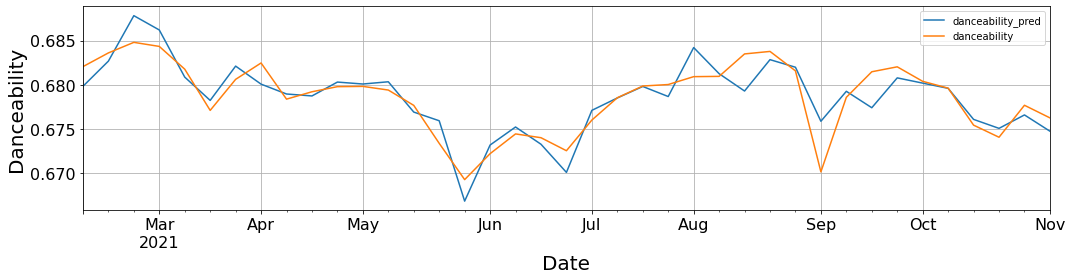

In [112]:
results_df['danceability_pred danceability'.split()].plot(grid=True, figsize=(15,4));
plt.xlabel('Date', fontsize=20)
plt.ylabel('Danceability', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join('figs', 'prediction_D.png'))

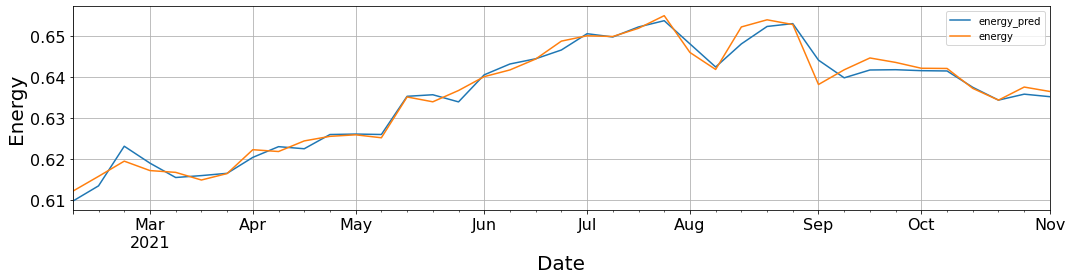

In [113]:
results_df['energy_pred energy'.split()].plot(grid=True, figsize=(15,4));
plt.xlabel('Date', fontsize=20)
plt.ylabel('Energy', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join('figs', 'prediction_E.png'))

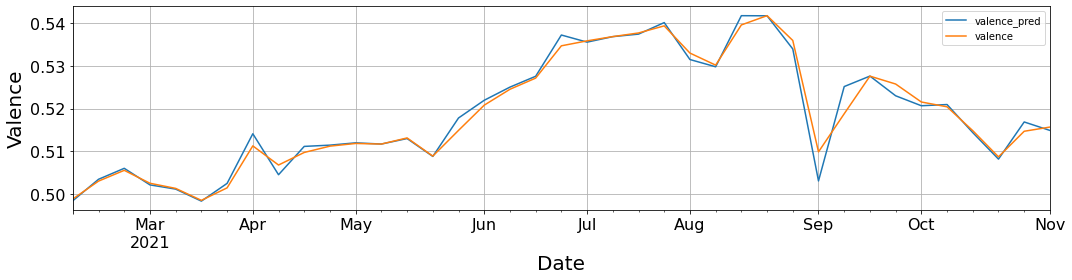

In [114]:
results_df['valence_pred valence'.split()].plot(grid=True, figsize=(15,4));
plt.xlabel('Date', fontsize=20)
plt.ylabel('Valence', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join('figs', 'prediction_V.png'))

In [115]:
print("That's all folks!")

That's all folks!
